In [73]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [74]:
df = pd.read_csv('../data/diabetes_prediction_dataset.csv')

In [75]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [76]:
df.shape

(100000, 9)

# DATA PROCESSING

In [77]:
display(df['diabetes'].value_counts())
display(df['gender'].value_counts())
df['smoking_history'].value_counts()    

diabetes
0    91500
1     8500
Name: count, dtype: int64

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [78]:
df.replace({'ever':'never'},inplace = True)
df.replace({'not current':'former'},inplace = True)
df = df[df['smoking_history'] != 'No Info']

In [79]:
df.smoking_history.value_counts()

smoking_history
never      39099
former     15799
current     9286
Name: count, dtype: int64

In [80]:
df.isnull().sum() 

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [81]:
df['gender'].value_counts()

gender
Female    38852
Male      25320
Other        12
Name: count, dtype: int64

In [82]:
df = df[df['gender'] != 'Other']
df.replace({'Female' : 0, 'Male' : 1}, inplace=True)

C:\Users\muril\AppData\Local\Temp\ipykernel_21380\2380877942.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Female' : 0, 'Male' : 1}, inplace=True)


In [83]:
df['gender'].value_counts()

gender
0    38852
1    25320
Name: count, dtype: int64

In [95]:
df.replace({'never' : 0, 'current' : 1, 'former' : 2},inplace=True)

C:\Users\muril\AppData\Local\Temp\ipykernel_21380\2808355781.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'never' : 0, 'current' : 1, 'former' : 2},inplace=True)


In [96]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,0,27.32,6.6,85,0


In [97]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000
mean,0.394565,46.547268,0.097909,0.047045,0.636851,28.424262,5.564279,139.629792,0.109799
std,0.488761,19.539695,0.297194,0.211738,0.850546,6.515975,1.095535,42.166693,0.312641
min,0.000000,0.160000,0.000000,0.000000,0.000000,10.080000,3.500000,80.000000,0.000000
25%,0.000000,31.000000,0.000000,0.000000,0.000000,24.600000,4.800000,100.000000,0.000000
50%,0.000000,47.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,31.100000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.000000,1.000000,2.000000,91.820000,9.000000,300.000000,1.000000


# DATA VISUALIZATION

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

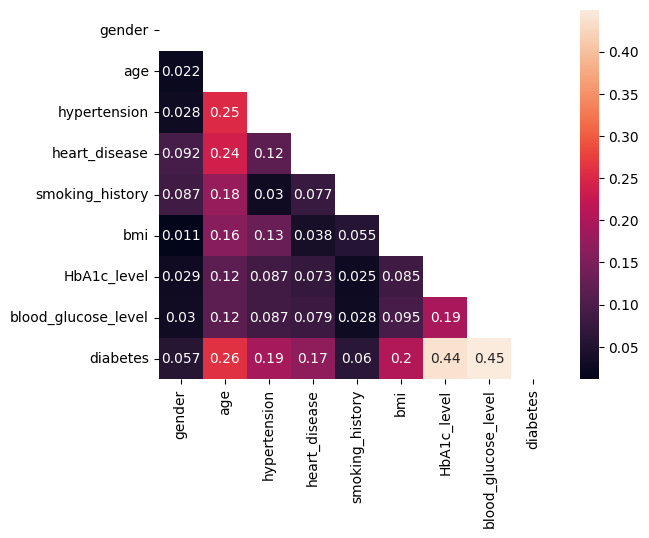

In [99]:
corr = df.corr()
sns.heatmap(corr,annot=True,mask = np.triu(np.ones_like(corr,dtype=bool)))

Podemos perceber que os dados de 'blood_glucose_level' e 'HbA1c_level' tem relação muito próxima nos casos de diabetes.

A idade e o bmi também representam indicativos fotes que podem ser usados para o treinamento preditivo

In [100]:
df.nunique() 

gender                    2
age                     101
hypertension              2
heart_disease             2
smoking_history           3
bmi                    3943
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

<Axes: xlabel='gender', ylabel='count'>

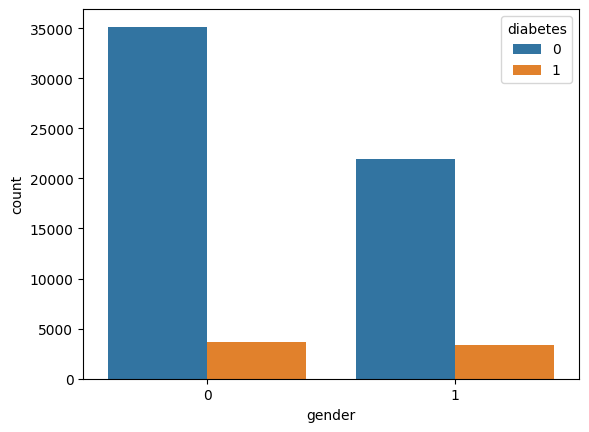

In [101]:
sns.countplot(data=df,x='gender',hue='diabetes')

<Axes: xlabel='diabetes', ylabel='count'>

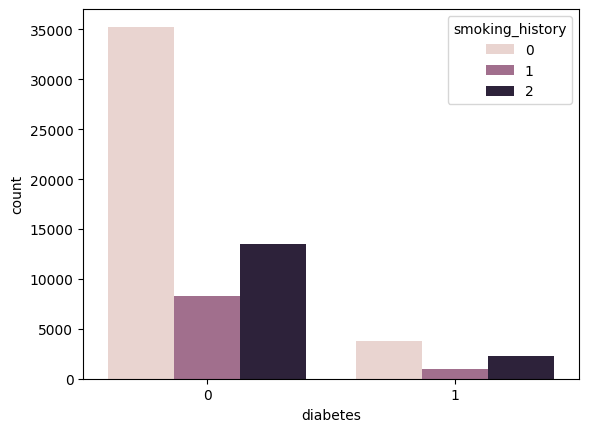

In [103]:
sns.countplot(data=df,x='diabetes',hue='smoking_history')

C:\Users\muril\AppData\Local\Temp\ipykernel_21380\526935147.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['age'])


<Axes: ylabel='Density'>

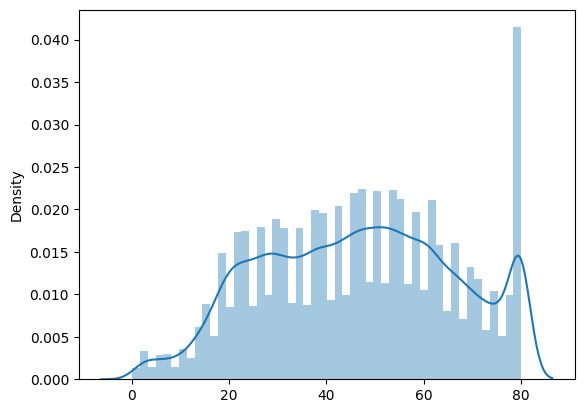

In [107]:
sns.distplot(x=df['age']) 